# **Statistical learning**

**Statistical learning can be divided into two types;**   
**1) Supervised learning - when given a set of inputs and outputs, the algorithm learns to associate the inputs and outputs. The outputs needs to be provided by the supervisor which can be a human/another algorithm.     
2) Unsupervised learning - collection of techniques and algorithms that are given inputs only with no outputs. The goal is to learn relationships and structure from such data.**    

## **_Basics of supervised statistical learning_**

**Regression - refers to problems that have continuous outputs    
Classification - refers to problems that have categorical outputs.**

**Quantitative variables - numerical variables such as $10,000, 65.4 kg, 176.3 cm   
Qualitative variables - values in a given category such as male/female  
Qualitative variables can have many classes,  
Sex is a qualitative variable with 2 classes - male/female   
Sometimes quantitative variables can be converted to categorical variables by specifying the cutoff margins between categories.  
e.g. short - <150 cm, medium - <180cm > 150cm, tall - >180cm  
The quantitative variable height is now categorized into 3 qualitative variables short, medium and tall**  

**Methods in supervised learning is divided into 2 types based on whether the output aka outcome is quantitative or qualitative.  
Problems associated with quantitative outcomes are called regression problems.  
Problems associated with qualitative outcomes are called classification problems.  
We seek a function f(X) that predicts Y for given inputs of X.  
The best function depends on the so-called `loss-function` which is a way of quantifying how far the predictions of Y for a given X are true with the observed values of Y.**

**In regression the most common loss function is the `squared error loss` where the best prediction value for a given X is the conditional expectation / a conditional average of Y for the given X.   
Meaning the best fit for outcome Y is the mean of all possible Y values for the provided input X.**  

**In classification problems the most commonly used loss function is the `0-1 loss` where the best classification for a given X is obtained by classifying observations of the class with the highest conditional probability for the given X.   
Meaning we compute the probabilities of all classes for the given X value, and assign the X value to the class with the highest probability.** 

## **Generating example regression data**

In [3]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
np.random.seed(1)

**Generating input data**

In [4]:
x = ss.uniform.rvs(size=100) * 10 
# uniform.rvs() generates random variables within the range 0 to 1. to get random variables between 0 to 10 the 
# result is multiplied by 10
x

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
       2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
       4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00,
       8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00,
       8.76389152e+00, 8.94606664e+00, 8.50442114e-01, 3.90547832e-01,
       1.69830420e+00, 8.78142503e+00, 9.83468338e-01, 4.21107625e+00,
       9.57889530e+00, 5.33165285e+00, 6.91877114e+00, 3.15515631e+00,
       6.86500928e+00, 8.34625672e+00, 1.82882773e-01, 7.50144315e+00,
       9.88861089e+00, 7.48165654e+00, 2.80443992e+00, 7.89279328e+00,
       1.03226007e+00, 4.47893526e+00, 9.08595503e+00, 2.93614148e+00,
       2.87775339e+00, 1.30028572e+00, 1.93669579e-01, 6.78835533e+00,
       2.11628116e+00, 2.65546659e+00, 4.91573159e+00, 5.33625451e-01,
      

**Generating outcome data**

In [5]:
beta1 = 5  # constants
beta2 = 2  # constants

y = beta1 + (beta2 * x)  # y = c + mx  
y += ss.norm.rvs(loc=0, scale=1, size=100)  # adding random noise to output from a normal distribution with 
# mean = 0, sd = 1
y

array([13.65607504, 17.38428865,  4.69608348, 11.8746261 ,  8.16521255,
        7.60878308,  8.50287608, 11.71045647, 13.12191088, 16.18638633,
       13.58219001, 18.82339865,  8.41838271, 22.93991251,  5.66957313,
       19.53883411, 14.54501393, 16.35895299,  7.43245382,  8.32329937,
       21.43838573, 24.44257158, 10.92462989, 18.89004917, 21.9077822 ,
       23.5901653 ,  6.25375566,  7.00560337,  8.80010003, 23.15642859,
        5.87202483, 13.59153493, 24.89834705, 14.7096051 , 18.57132377,
       11.34292717, 17.35690123, 22.00767283,  6.21192619, 19.14337036,
       25.12776776, 18.65102968, 10.57018433, 19.16981421,  8.18593784,
       14.36677106, 23.14729311, 10.09712135, 12.0292627 ,  9.56767319,
        3.52935729, 19.81287469, 10.86021307, 10.64894488, 13.63219515,
        6.93059622, 16.30143181,  7.33065087, 15.5560526 , 19.5457047 ,
        7.83949544, 12.65758903, 19.40857949, 12.139244  ,  6.80093021,
       15.76449542, 18.08932313, 15.19603637, 24.76078128, 17.48

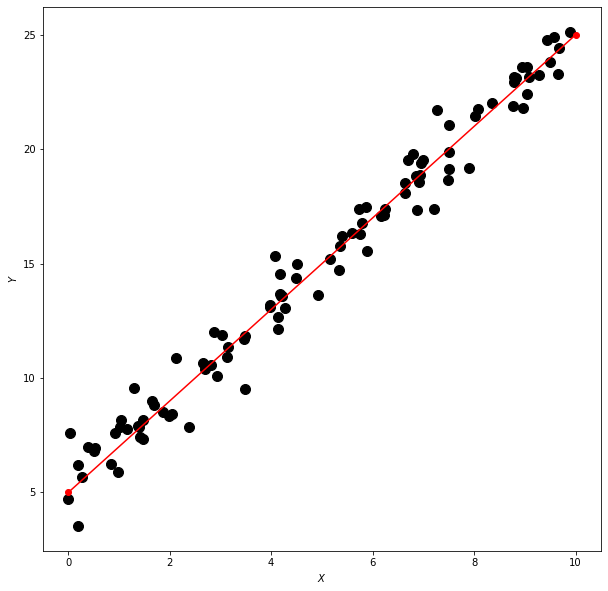

In [6]:
plt.figure(figsize=(10,10))
plt.plot(x,y, color="black", marker="o", linestyle="none", markersize=10)  # plotting the random points
plt.plot(np.array([0,10]), beta1 + (beta2 * np.array([0,10])), "ro-") # plotting the regression line
plt.rcParams["font.size"]=5
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.show()

In [7]:
 n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale = 1, size = n) 

In [8]:
np.mean(x)

4.8587792760014565

In [9]:
np.mean(y)

14.80142786070299

# **_Simple linear regression_**    
_______________

## **Y = $\beta_1$ X + $\beta_0$ + $\xi$**   
**Y is the outcome variable  
X is the random input variable**  
#### **$\xi$ is the random noise/error**  
#### **$\beta_0$ , $\beta_1$ are random parameters**

**Once a, b have been estimated using the training datasets, the model can be used to predict Y values for given X values**

**Take n observations (inputs);    
(x1,y1), (x2,y2), (x3,y3), ......... (xn,yn) which are data points in the training dataset   
Most common approach to estimate the model parameters $\beta_0$ & $\beta_1$ is by minimizing the least squares criterion.  
$i^{th}$ residual is defined as e**   
### **$e_i$ = $Y_i$ - $Y'_i$**  
$Y_i$ is the actual outcome for thr given input X   
$Y'_i$ is our predicted outcome for the given input X  
**From this the residual sum of squares (RSS) can be defined as follows:**   
## **RSS = $e_0^{2}$ + $e_1^{2}$ + $e_2^{2}$ + $e_3^{2}$ + ..... $e_n^{2}$**

In [10]:
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale = 1, size = n) 

In [11]:
 def compute_rss(y_estimate, y):
  return sum(np.power(y-y_estimate, 2))

def estimate_y(x, b_0, b_1):
  return b_0 + b_1 * x

rss = compute_rss(estimate_y(x, beta_0, beta_1), y) 

In [12]:
rss

81.540007425512

### **_Least squares estimation in code_**

### **Assuming the true value of $\beta_0$ is known, estimating the value of $\beta_1$, the gradient of the regression line**

In [13]:
rss = []
slopes = np.arange(-10,+15,0.01)  # similar to R's seq()

for s in slopes:  # beta 1 is the slope (given here as arbitrary values in the list "slopes")  
    Y = (s * x) + beta_0  # predicted y values,  beta0 is the intersect
    e = y - Y   # difference between predicted & observed outcome (the array computed in previous ex. is taken as observed outcomes here)
    rss.append(np.sum(e**2))  # appending the sum of least squares

In [14]:
rss;  # perfecto

**Finding the index of minimum value in the list `rss`**

In [15]:
np.argsort(rss)

array([1200, 1201, 1199, ..., 2497, 2498, 2499], dtype=int64)

In [16]:
rss[1200]

81.54000742551887

In [17]:
rss[2499]

544340.379384253

In [18]:
np.argsort(rss)[0]   # voila  index of the lowest value in the list rss

1200

In [19]:
np.where(rss == min(rss))  # works too

(array([1200], dtype=int64),)

In [20]:
np.where(rss == min(rss))[0][0]

1200

In [21]:
rss[np.where(rss == min(rss))[0][0]]  # voila

81.54000742551887

In [22]:
# or more simply
rss_min = np.argmin(rss)
rss_min

1200

In [23]:
print("The best estimate for the slope is ", slopes[rss_min])

The best estimate for the slope is  1.9999999999997442


In [24]:
len(slopes) == len(rss)

True

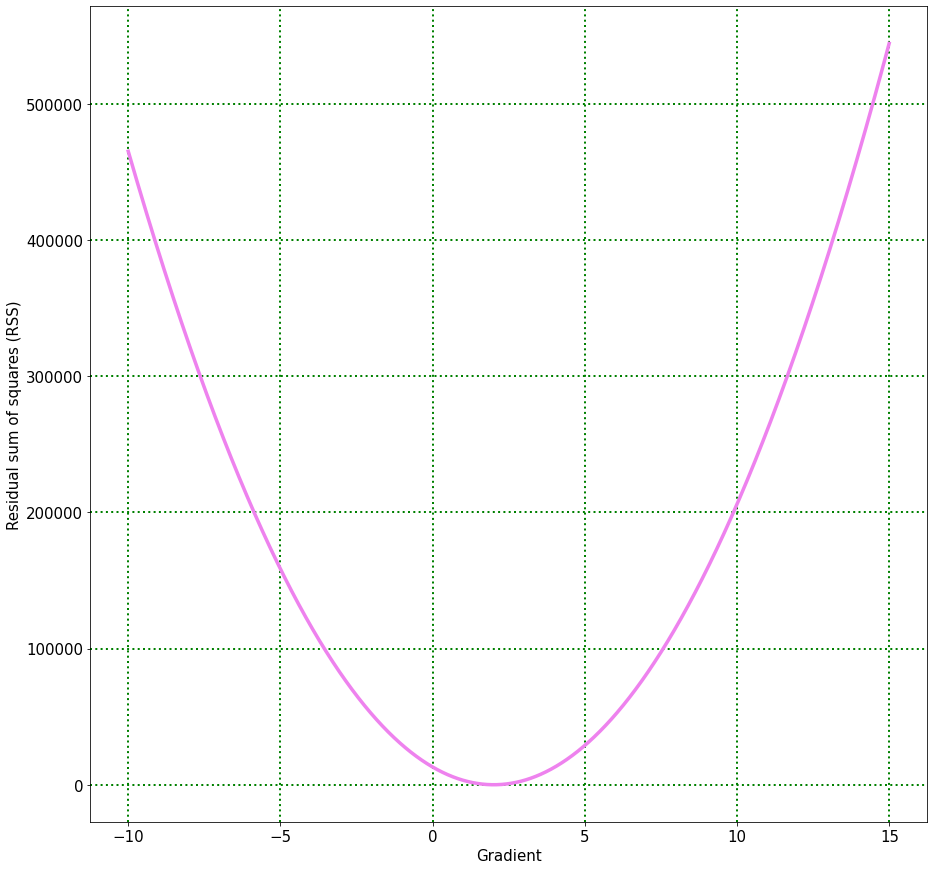

In [25]:
plt.figure(figsize=(15,15))
plt.rcParams["font.size"]=15
plt.plot(slopes, rss, color="violet", markersize=10, linestyle="-", linewidth=3.5)
plt.grid(linestyle="dotted", linewidth=2, color="green", )
plt.ylabel("Residual sum of squares (RSS)")
plt.xlabel("Gradient")
plt.show()

**The goal was to find the value of slope beta 1 that gives the lowest residual sum of squares (RSS).  
From the plot this value occurs around 2!  
This agrees with our estimate of 1.99**

## **_For a more finer deduction_**

In [26]:
rss = []
slopes = np.arange(-10,+15,0.001)  

for s in slopes:  
    Y = (s * x) + beta_0  
    e = y - Y   
    rss.append(np.sum(e**2)) 

In [27]:
from matplotlib.ticker import MultipleLocator as ML
from matplotlib.ticker import ScalarFormatter as SF

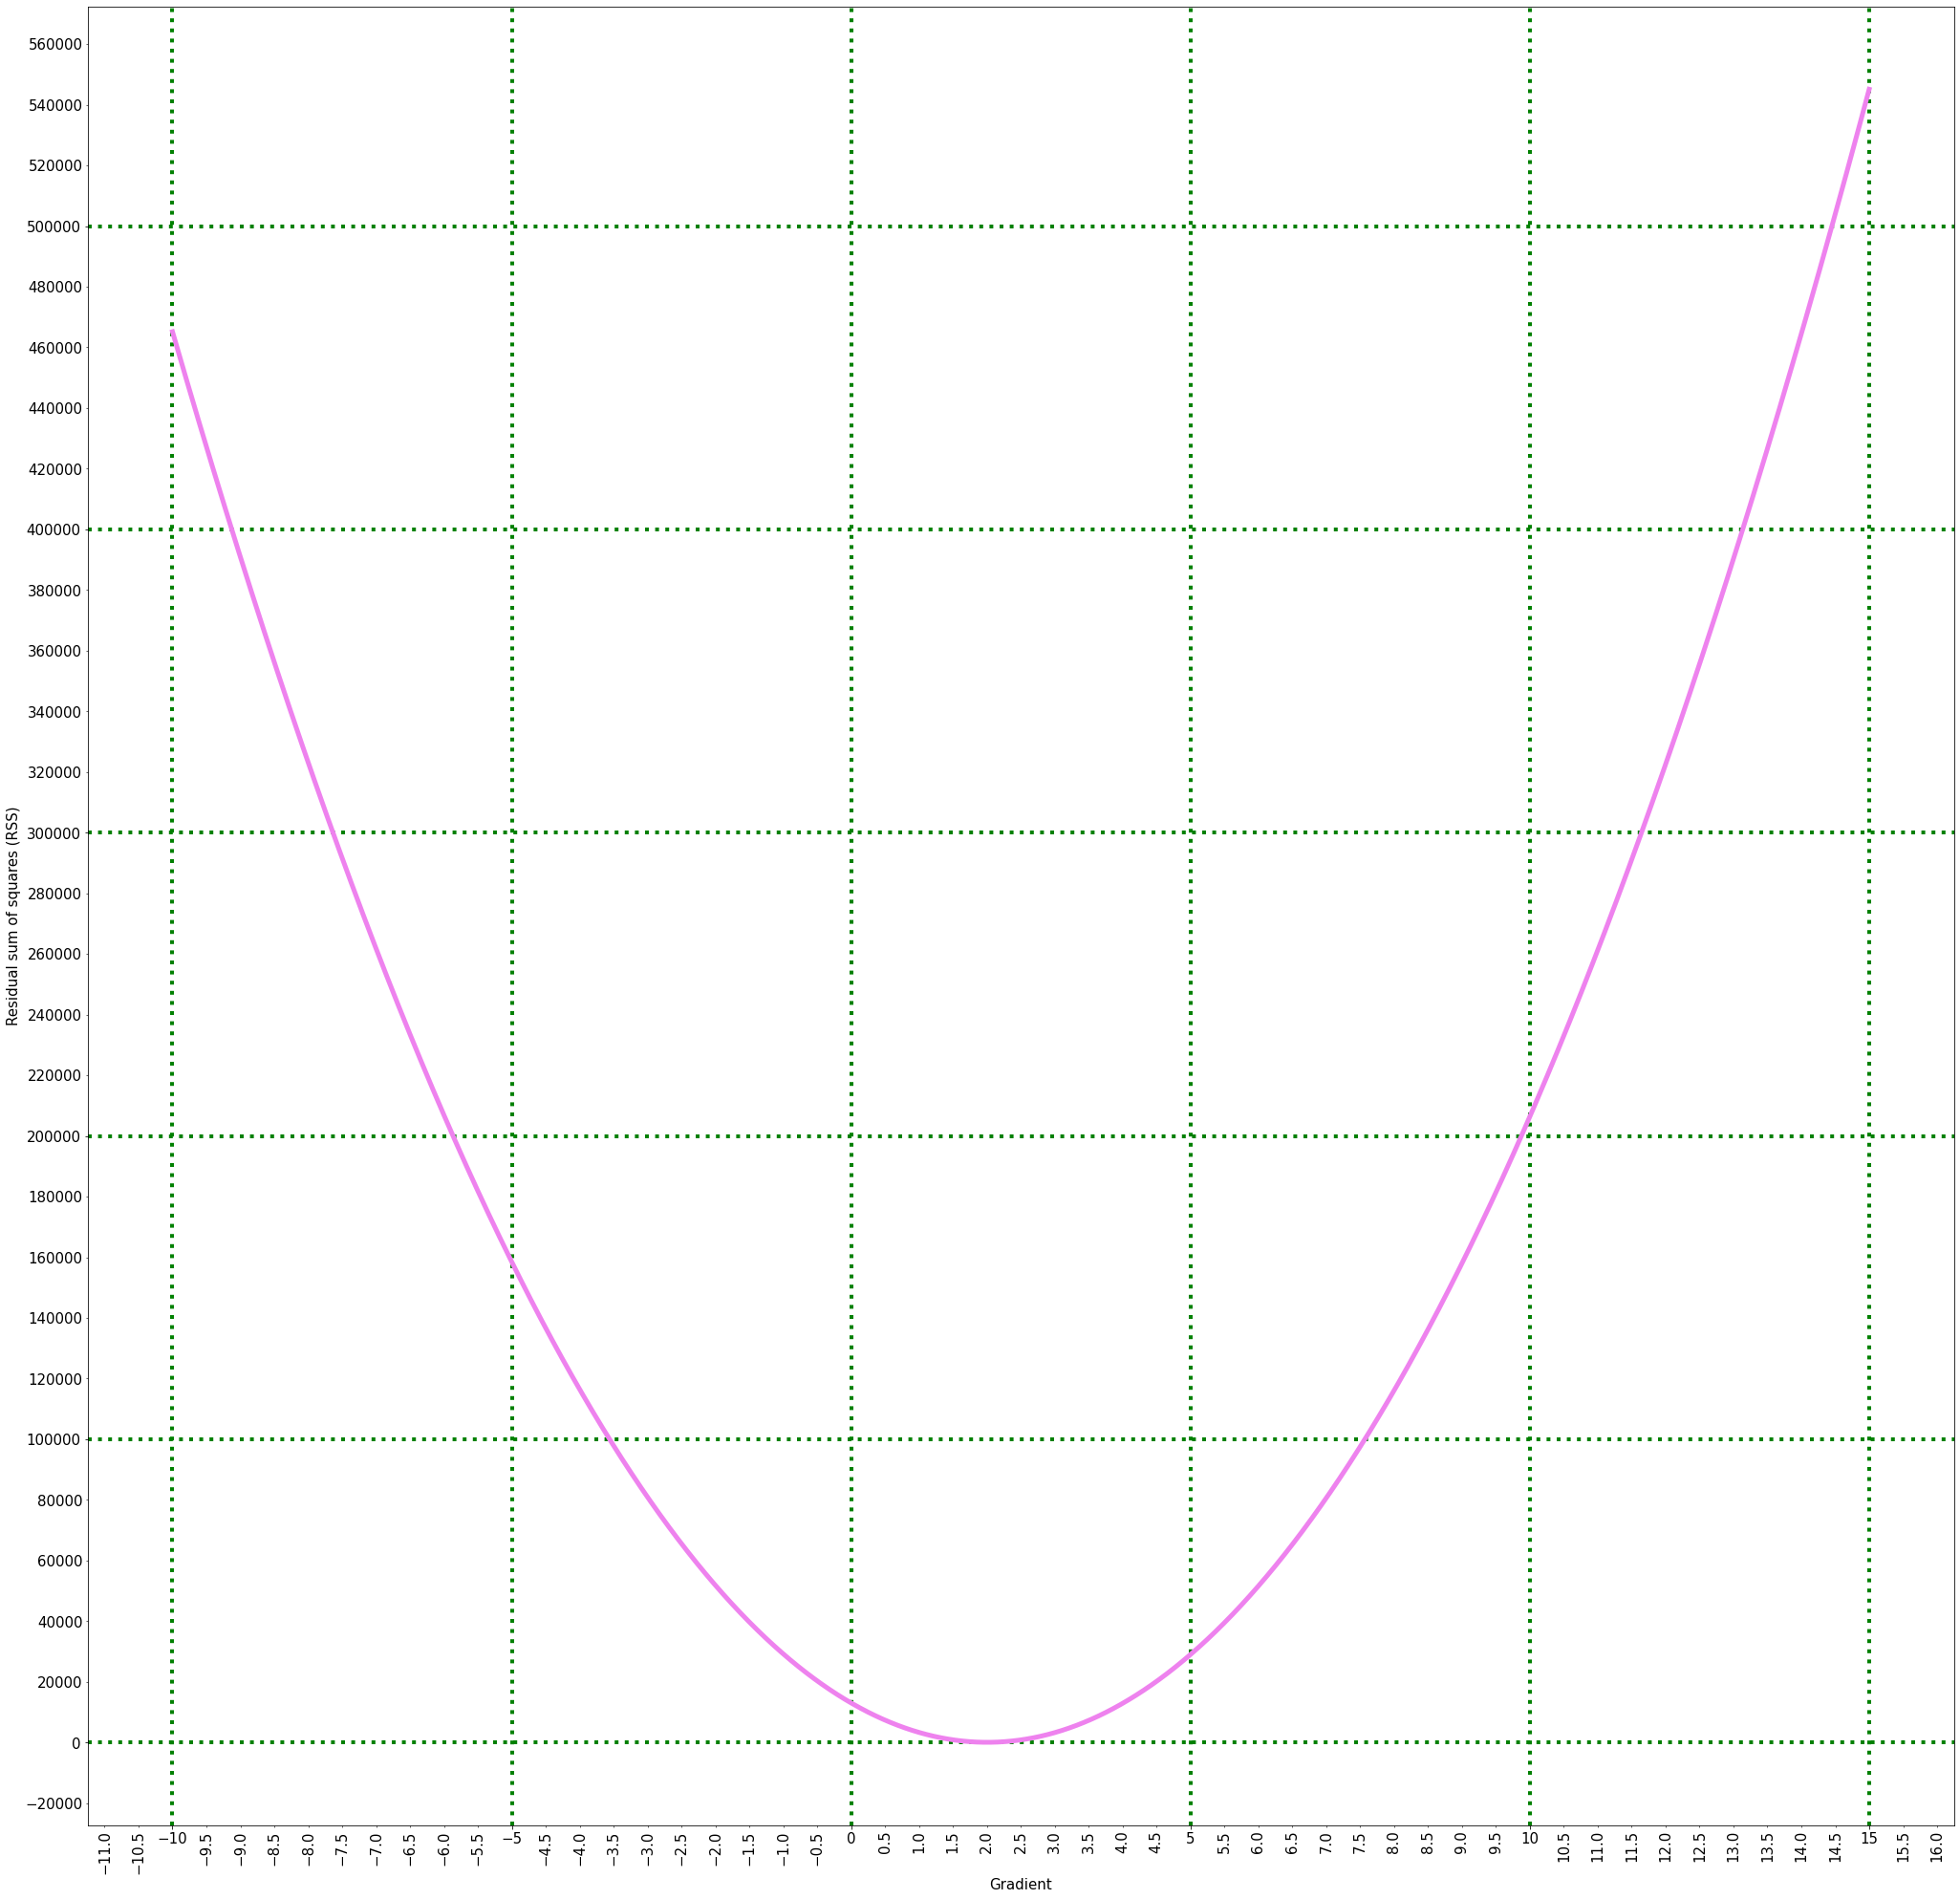

In [28]:
fig, ax = plt.subplots(figsize=(35,35))
plt.rcParams["font.size"]=25
ax.plot(slopes, rss, color="violet", markersize=10, linestyle="-", linewidth=5)
ax.xaxis.set_minor_locator(ML(0.5))
ax.xaxis.set_minor_formatter(SF())
ax.tick_params(axis="x",which="minor",rotation=90)
ax.yaxis.set_minor_locator(ML(20000))
ax.yaxis.set_minor_formatter(SF())
ax.tick_params(axis="y",which="minor",rotation=0)
plt.grid(linestyle="dotted", linewidth=4, color="green", )
plt.ylabel("Residual sum of squares (RSS)")
plt.xlabel("Gradient")
plt.show()

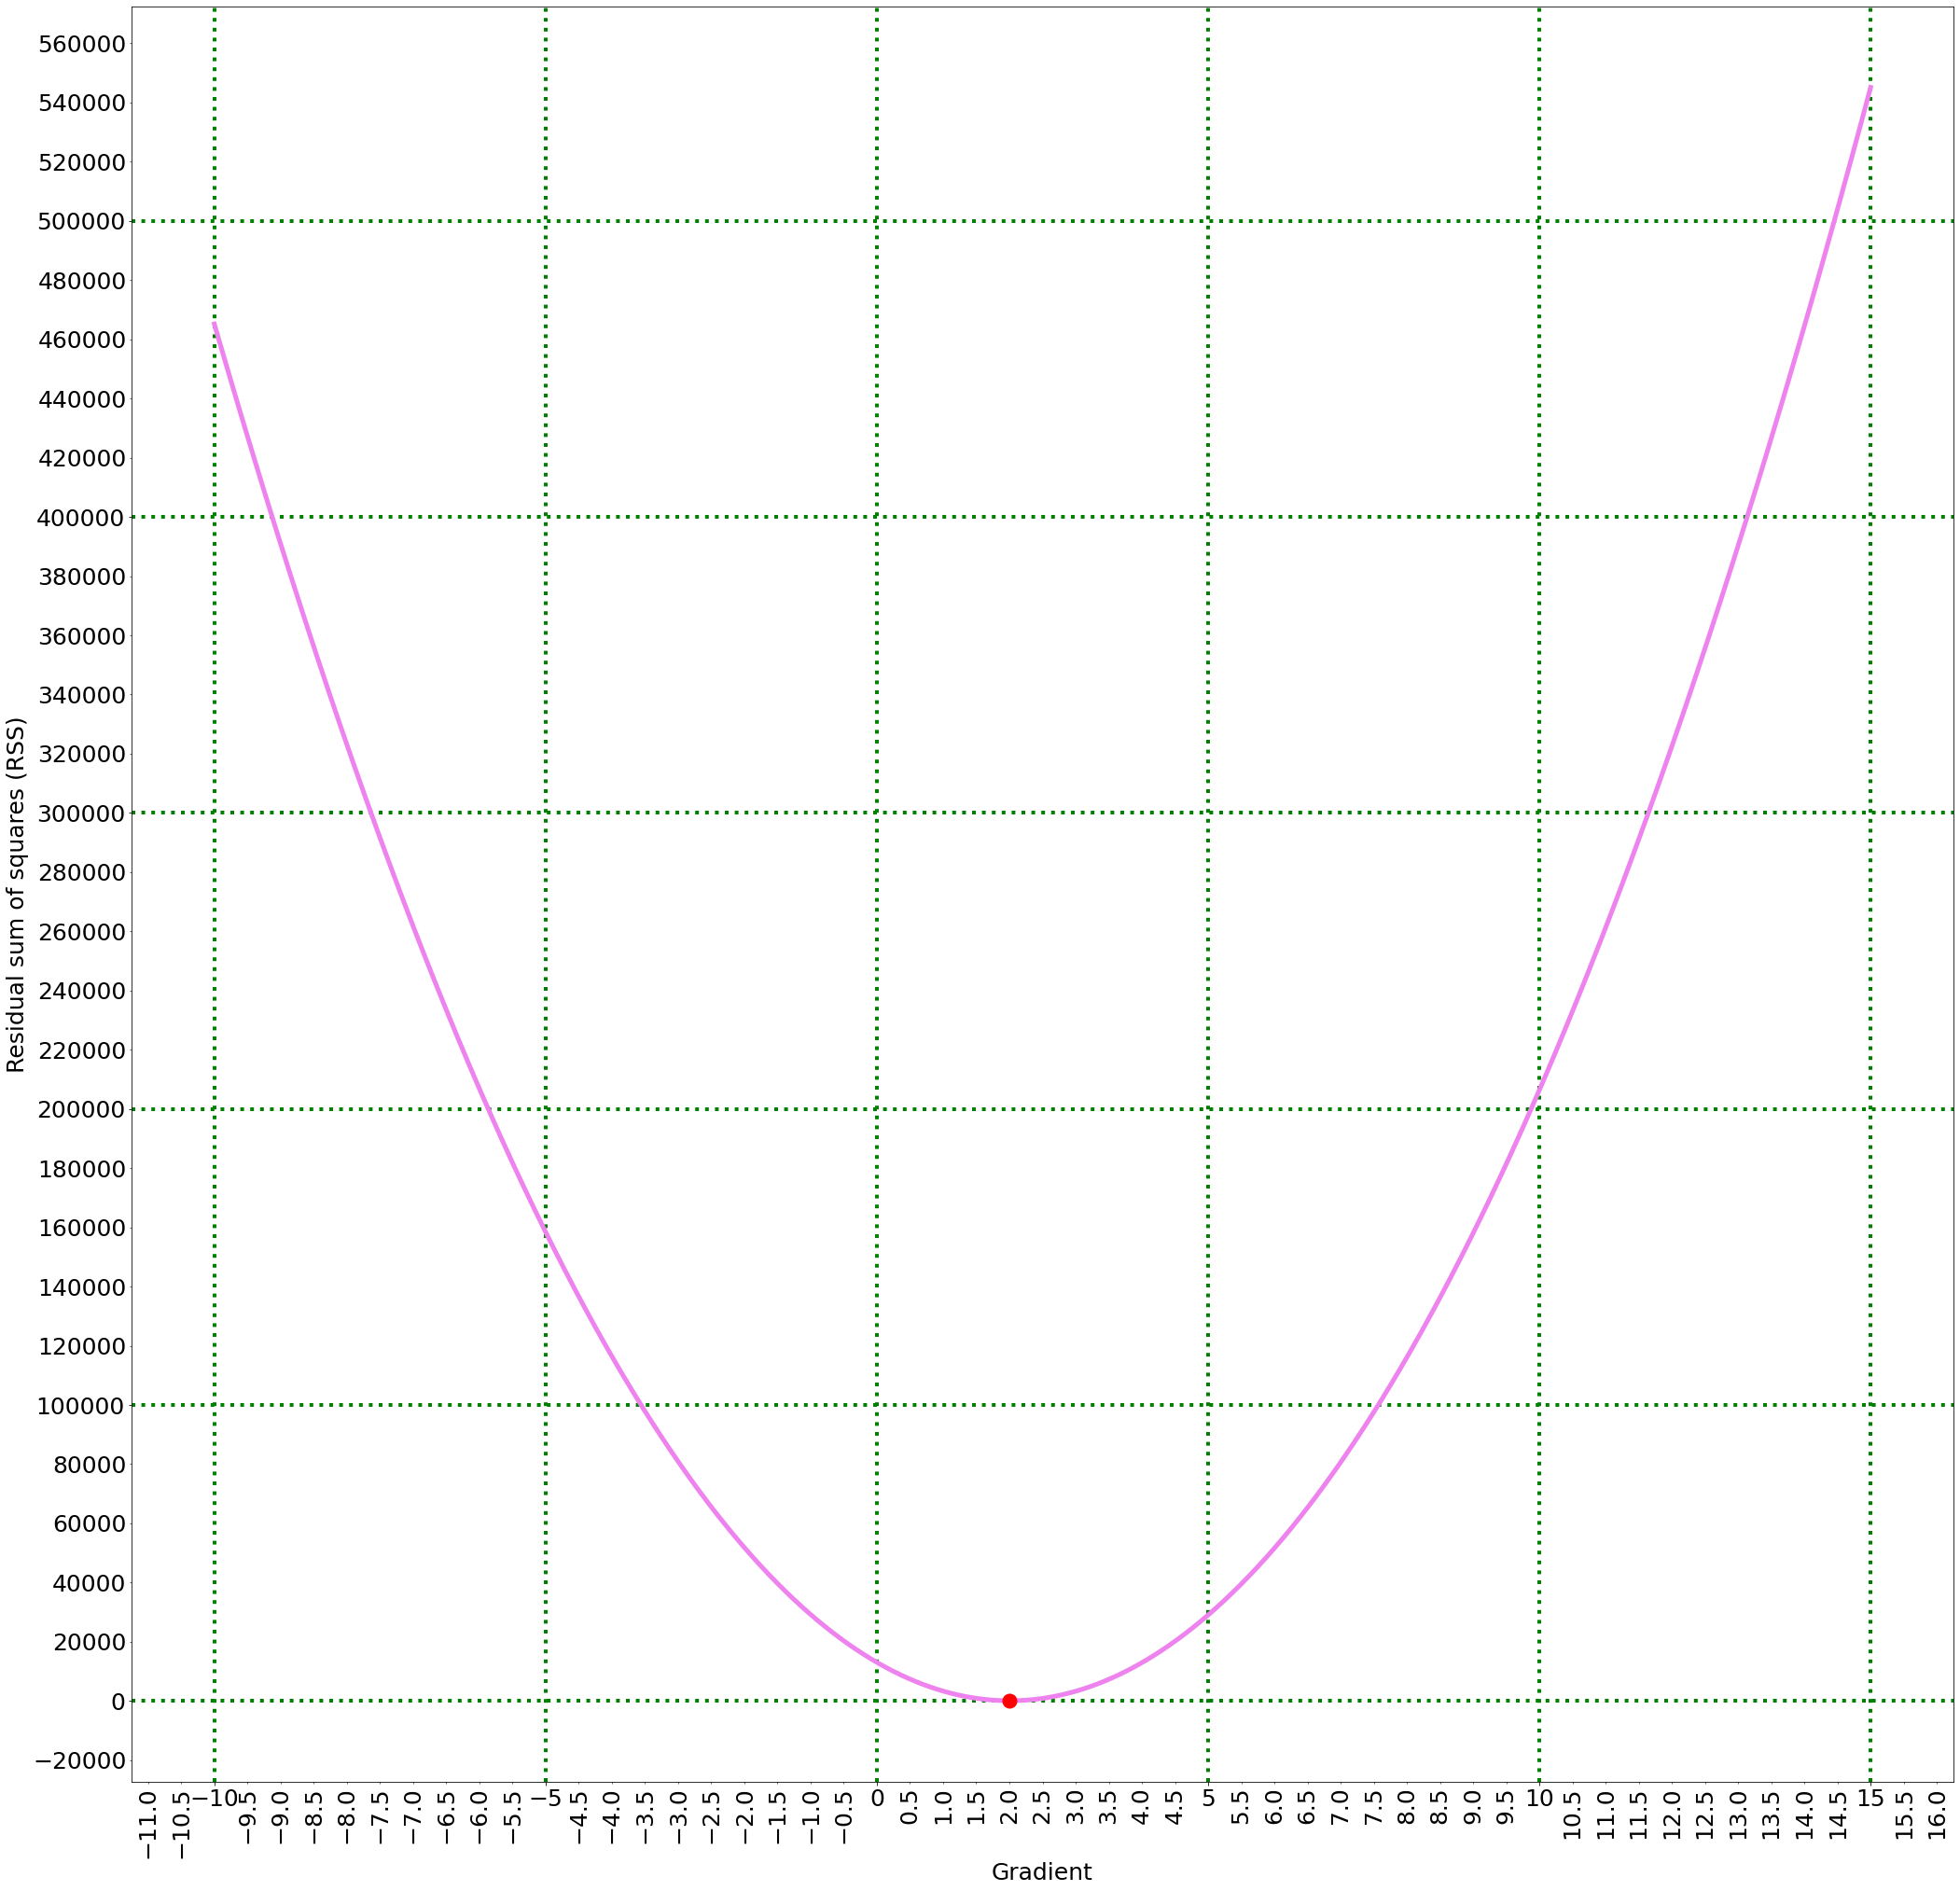

In [29]:
fig, ax = plt.subplots(figsize=(35,35))
plt.rcParams["font.size"]=25
ax.plot(slopes, rss, color="violet", markersize=10, linestyle="-", linewidth=5)
ax.plot(2.0,0, color="red", marker="o", markersize=15, linestyle="none")
ax.xaxis.set_minor_locator(ML(0.5))
ax.xaxis.set_minor_formatter(SF())
ax.tick_params(axis="x",which="minor",rotation=90)
ax.yaxis.set_minor_locator(ML(20000))
ax.yaxis.set_minor_formatter(SF())
ax.tick_params(axis="y",which="minor",rotation=0)
plt.grid(linestyle="dotted", linewidth=4, color="green", )
plt.ylabel("Residual sum of squares (RSS)")
plt.xlabel("Gradient")
plt.show()

## **_Simple linear regression_**

In [ ]:
import statsmodels.api as sm

In [88]:
mod = sm.OLS(y, x)  # OLS stands for ordinary least squares

In [89]:
est = mod.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Sat, 01 Jan 2022   Prob (F-statistic):                    1.14e-75
Time:                        13:34:42   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Model was fitted with a single variable `x1`, and the estimated coefficient is `2.7569`   
Which is tad high since the true value is 2.0  
This happened because here we fitted the data to a model with no intercept!! as stated in the model summary:  
`R² is computed without centering (uncentered) since the model does not contain a constant.`  
But our plot did have an intercept, since this model forces the data through a model with no intercept the line is forced to go through the origin, hence the deviation!!**

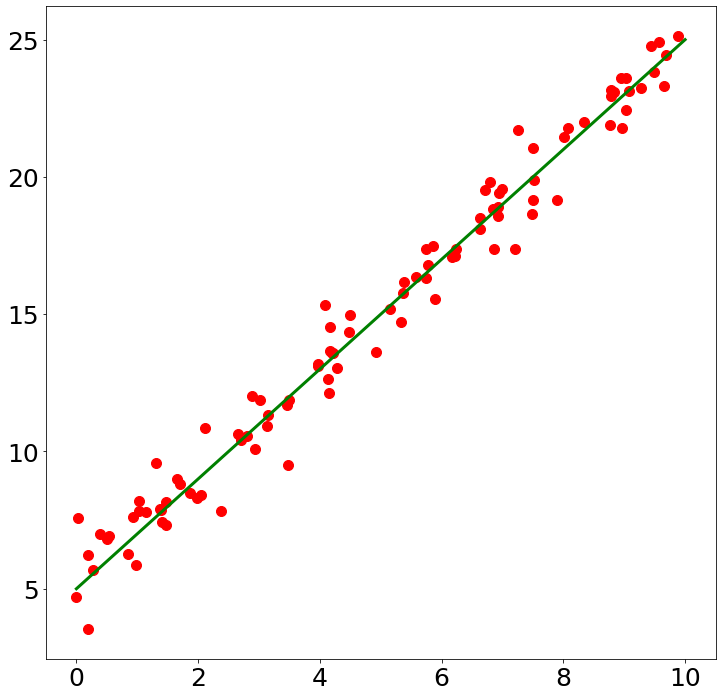

In [90]:
plt.figure(figsize=(12,12)) 
plt.plot(x,y, linestyle="none", marker="o", color="red", markersize=10)
plt.plot(np.array([0,10]), np.array([5,25]), color="green", marker="", linestyle="-", linewidth=3)
plt.show()

**Plot indeed has an intercept** 
## **Fitting a model with the intercept term**

In [91]:
new_x = sm.add_constant(x)  # adds one column of ones (1.0000....)

In [92]:
new_x[:10]

array([[1.00000000e+00, 4.17022005e+00],
       [1.00000000e+00, 7.20324493e+00],
       [1.00000000e+00, 1.14374817e-03],
       [1.00000000e+00, 3.02332573e+00],
       [1.00000000e+00, 1.46755891e+00],
       [1.00000000e+00, 9.23385948e-01],
       [1.00000000e+00, 1.86260211e+00],
       [1.00000000e+00, 3.45560727e+00],
       [1.00000000e+00, 3.96767474e+00],
       [1.00000000e+00, 5.38816734e+00]])

In [93]:
new_x.shape

(100, 2)

In [94]:
model = sm.OLS(y, new_x)
estimate = model.fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           7.47e-82
Time:                        13:34:43   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

**Now the model returns two predictors, `const`= 5.2 & `x1` = 1.9685  
And these values are very close to previously computed values!.**

The intercept 5.237 is the value of `y` when all other terms are 0s, in this case just x = 0.   
The slope/gradient 1.9685 means that when `x1` increases by 1, `y` increases by 1.9685.

## **By generating a new sample of data and feeding it to the model, we can obtain different predictors for `x1` and `y`.**   
**By repeating this again and again sampling distributions of estimates for gradient & intercept can be obtained.  
These distributions are known as the sampling distributions of the parameter estimates.   
Standard deviation of distributions is known as standard error.  
The smaller the standard error, the more precisely the population parameters are estimated.**

**Take the value of standard error, multiply by the parameter and add/subtract to/from the parameter to get the 95% confidence interval.**

In [95]:
std_er_con = 0.174
std_er_x1 = 0.031
const = 5.2370
x1 = 1.9685

In [96]:
print("95% confidence interval for const: ", const - (const*std_er_con)," to ", const + (const*std_er_con)) 

95% confidence interval for const:  4.325762  to  6.148238


In [97]:
print("95% confidence interval for const: ", x1 - (x1*std_er_x1)," to ", x1 + (x1*std_er_x1)) 

95% confidence interval for const:  1.9074765  to  2.0295235


**The output summary includes the $R^{2}$ statistics; which is the proportion of variance explained.  
Since it is a proportion it is always between 0 and 1.  
What is `variance explained` actually mean?  
<br>
Before fitting the model, the total sum of squares (TSS) can be computed, which is defined as the sum of squared differences between outcome $y_i$ and the mean outcome.   
After fitting the model residual sum of squares (RSS) is computed, which is defined as the sum of squared differences between the outcome $Y_i$ and the outcome predicted by the model `y`.**

#### Has the model been useful, the RSS will be smaller than the TSS.  <br>  $R^{2}$ = $\frac{TSS - RSS}{TSS}$

# **_Multiple linear regression_**

Here the goal is to predict a quantitative/scalar valued response `y` based on several predictor variables.  
The model takes the following form:   
### &emsp; **Y = $\beta_0$ + $\beta_1$ $X_1$ + $\beta_2$ $X_2$ + ........+ $\beta_p$ $X_p$ + $\xi$**   
Multiple linear regression is very similar to simple linear regresion. 

## **_Using Sci-kit learn for linear regression_**

In [98]:
N = 500   # sample size
beta0 = 5
beta1 = 2
beta2 = -1

In [99]:
np.random.seed(1)  # random seed

In [100]:
x1 = 10 * ss.uniform.rvs(size=N)

In [101]:
x2 = 10 * ss.uniform.rvs(size=N)

**Multiple linear regression**

In [102]:
y = beta0 + (beta1 * x1) + (beta2 * x2) + ss.norm.rvs(loc=0,scale=1,size=N)  
# beta0 = intercept
# beta1,beta2 = slopes
# ss.norm.rvs(size=N) = random noise

In [103]:
X = np.stack([x1,x2], axis=1)  # creating a matrix

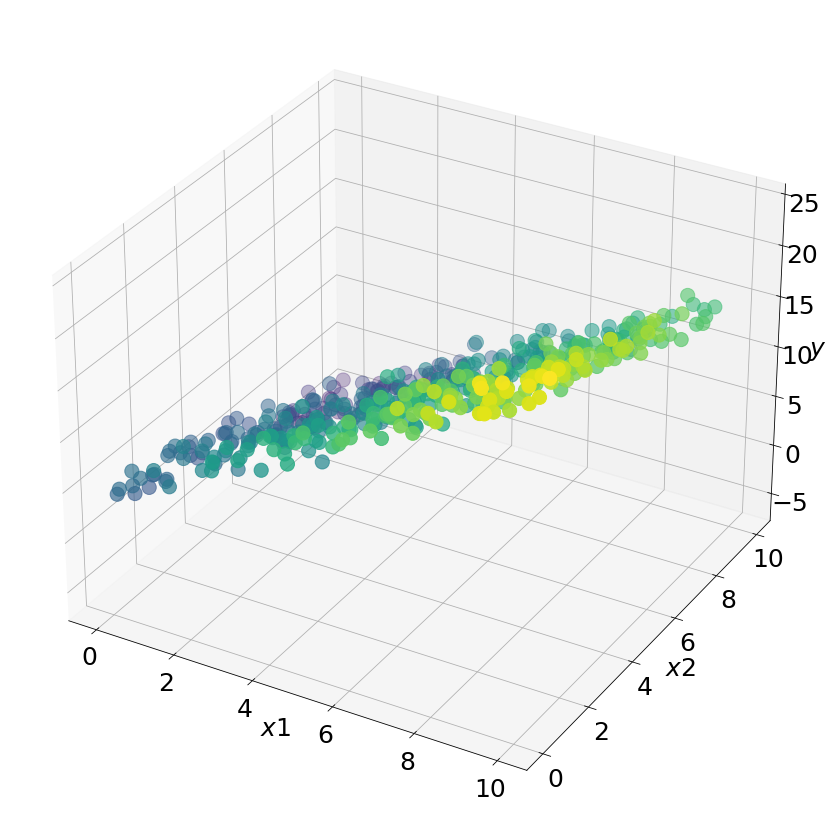

In [104]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:,1], y, c=y, s=200)
ax.set_xlabel("$x1$")
ax.set_ylabel("$x2$")
ax.set_zlabel("$y$")
plt.show()

**There is indeed a plane in the 3 dimensional plot**

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
l_model = LinearRegression(fit_intercept=True)   # needed when a non 0 intercept is present in the data
l_model.fit(X,y)

LinearRegression()

In [107]:
l_model.intercept_   # intercept of the fitted linear regression model

5.154077763777253

In [108]:
l_model.coef_    # beta1 and beta2 respectively - coefficients predicted by the model

array([ 1.9999379 , -1.02026449])

print(5/5.154077763777253 *100)
print(1.9999379/2 * 100)
print(-1/-1.02026449 * 100)

The predicted values are almost equal to the values of beta0, beta1 & beta2 used to generate the x1,x2 & y variables. 

In [109]:
x0 = np.array([2,4])
l_model.predict(x0)

ValueError: Expected 2D array, got 1D array instead:
array=[2 4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

**Clearly read the error message!!   
`array.reshape(1, -1) if it contains a single sample.` means that the datapoint passed for that operation needs to be reshaped in the requested fromat.!!**

In [ ]:
l_model.predict(x0.reshape(1,-1))    # voila

To se the $R^{2}$ statistic, the `.score()` function can be used.

In [ ]:
l_model.score(X, y)     # the first argument is the inputs (a matrix in this case), second is the output
# what happes here is that the model takes in the inputs and makes the prediction, then compares 
# the model predictions to the actual outcomes passed in as the y variable!

**Assessing model accuracy**   
In regression problems the performance of the model is quantified using the `mean squared error` method, through computing how well the predictions of the model agree with the actual outcomes.

MSE is given by:    
&emsp; &emsp; &emsp; &emsp; MSE = $\frac{1}{n}$ $\sum_{i=1}^{n}$ ($y_i - f(x_i))^{2}$  
 
If the MSE is computed using the training data, its called the `training MSE`.    
What actually matters is how well the model performs on a new dataset than the one used to train the model.   
The MSE computed for a new test dataset is called `test MSE`.    

To evaluate how well a classifier performs, the `training error rate` is computed. The `TRE` is the proportion of error the classifier made when applied to the training data.   
`Test error rate` is the proportion of errors/misclassifications that the classifier makes when applied to the test data.   


This can be done using only the training data. First divide the training data into two parts. Use the forst part to train the model, and the second to make predictions. Compare the predictions with the actual outcomes.  

In [ ]:
from sklearn.model_selection import train_test_split    # to split a dataset into training data and test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.5, random_state=1)   
# train_size= is the proportion of the data to be allocated for training. 
# random_state is like random.seed() - to fixate the values

In [ ]:
LM = LinearRegression(fit_intercept=True)
LM.fit(x_train,y_train)

In [ ]:
LM.score(x_test, y_test)

What happens here in the `.score()` method is, the first argument `x_test` gives the predictors to the linear model.  
The second argument `y_test` gives the actual outcomes.  The model makes a prediction based on what it has learned from `x_train` & `y_train` and makes predictions for `x_test`, then compares the results with the actual outcome passed in as `y_test`.  Returns the proportion of matching predictions.

In [ ]:
LM.predict(x_test)

**Statistical models generally perform best when their capacity is appropriate for the complexity of the modelling task.  
Models that are too flexible can lead to overfitting, meaning the model starts to follow the noise in the data too closely. In extreme cases the model can memorize the datapoints rather than learn from the data. The issue in this is that it translates very poorly to unseen input data.   
In contrast a model that is too simple can easily underfit the data, where the model is not sufficiently flexible to learn the structure from the data.**